In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
from scipy.stats import johnsonsb, skewnorm, dgamma, genlogistic, dweibull, johnsonsu


In [46]:
power_plants = pd.read_csv('../../../elecsim/data/processed/power_plants/uk_power_plants/uk_power_plants.csv')
power_plants

,Unnamed: 0,Unnamed: 0.1,Company,Name,Fuel,Capacity,Start_date,Simplified_Type
0,0,0,AES,Ballylumford B,Gas,540.0,1968.0,Recip_gas
1,1,1,AES,Ballylumford B OCGT,Gas oil,116.0,1968.0,Recip_diesel
2,2,2,AES,Ballylumford C,CCGT,616.0,2003.0,CCGT
3,3,3,AES,Kilroot OCGT,Gas oil,142.0,1981.0,Recip_diesel
4,4,4,AES,Kilroot,Coal,560.0,1981.0,Coal
...,...,...,...,...,...,...,...,...
1080,1088,1088,WPO,Workington (Voridian),Wind,4.0,2006.0,Onshore
1081,1089,1089,WPO,Wythegill,Wind,1.5,2015.0,Onshore
1082,1090,1090,WPO,Ysgellog,Wind,4.6,2013.0,Onshore
1083,1091,1091,Xceco,Inner Dowsing,Wind (offshore),97.2,2009.0,Offshore


In [47]:
company_capacities = power_plants.groupby("Company").Capacity.sum().to_frame().reset_index()
company_capacities.sort_values("Capacity", ascending=False)

,Company,Capacity
10,EDF Energy,14763.0
37,RWE Generation SE,8664.0
42,SSE,8390.7
54,Uniper UK Limited,6605.0
46,Scottish power,4471.5
8,Drax Power Ltd,4035.0
34,Orsted,2738.7
18,Engie,2675.0
26,Intergen,2490.0
13,EPUKi,2270.0


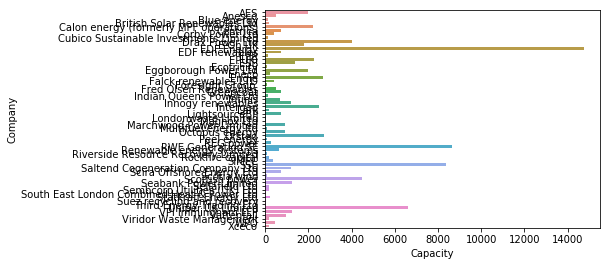

In [48]:
sns.barplot(data=company_capacities, y='Company', x="Capacity")

In [49]:
company_num_plants = power_plants.groupby("Company").Name.count().to_frame().reset_index()
company_num_plants.sort_values("Name", ascending=False)

,Company,Name
42,SSE,130
33,Octopus energy,121
28,LightsourceBP,100
1,Anesco,95
22,Greencoat,57
46,Scottish power,49
25,Innogy renewables,44
38,Renewable energy systems,38
58,WPO,37
9,E.On UK,36


In [53]:
company_stats = company_num_plants.merge(company_capacities, on="Company").sort_values("Capacity", ascending=False)
company_stats.head()

,Company,Name,Capacity
10,EDF Energy,14,14763.0
37,RWE Generation SE,11,8664.0
42,SSE,130,8390.7
54,Uniper UK Limited,9,6605.0
46,Scottish power,49,4471.5


In [58]:
company_stats['proportion'] = company_stats.Capacity/company_stats.Capacity.sum()*100
company_stats

,Company,Name,Capacity,proportion
10,EDF Energy,14,14763.0,17.385048
37,RWE Generation SE,11,8664.0,10.202808
42,SSE,130,8390.7,9.880967
54,Uniper UK Limited,9,6605.0,7.778110
46,Scottish power,49,4471.5,5.265680
8,Drax Power Ltd,3,4035.0,4.751654
34,Orsted,11,2738.7,3.225119
18,Engie,3,2675.0,3.150105
26,Intergen,3,2490.0,2.932247
13,EPUKi,2,2270.0,2.673173


In [67]:
import pickle
from fitter import Fitter
import fitter
result_distributions_object = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/run/Compare_worlds/result_distributions_object.p", "rb"))

In [74]:
resultant_dist = '{}'

dist_class = eval(list(result_distributions_object[resultant_dist].fitted_param.keys())[0] + ".rvs")
dist_object = dist_class(*list(result_distributions_object[resultant_dist].fitted_param.values())[0], size=50000).tolist()
dist_object


[1382.278789123733,
 101.45080217262118,
 216.15367102439495,
 2186.048664377833,
 127.50688127657155,
 -949.5705566642149,
 -1576.311268118744,
 296.0491991313828,
 3327.243812150886,
 1638.7613879848248,
 -1185.4495016492542,
 -908.7841593747438,
 895.753023379638,
 -3481.611602894545,
 1081.3759377403512,
 632.2708653858516,
 -597.4313829428905,
 -1039.1014222914787,
 -2144.0866283746404,
 319.6219492571764,
 -3413.683395116014,
 304.66189925266787,
 2833.6026248340854,
 -6128.52318449972,
 -1026.3954271999526,
 -373.7168746141413,
 2207.6081678717624,
 588.5850618276444,
 897.1071694468654,
 -4381.872143784083,
 -1844.420950359489,
 -66.3238172423039,
 1083.1390848206336,
 89.26177715327219,
 768.935669574719,
 -1403.2821373909358,
 747.2251787335697,
 2256.423290428246,
 590.1070933942588,
 -1429.5356949537868,
 1915.3237971244341,
 182.49747716660522,
 450.9081888778404,
 -111.1416516841202,
 644.5429784770472,
 -6127.471153532428,
 -5268.891396041696,
 -1058.165341261119,
 -5695